In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
df = pd.read_csv('data/unique_outages2.csv', parse_dates=['Start', 'Finish', 'file_name'])
df['Duration_Category'].value_counts()

Duration_Category
11.0–14.0 hrs    649
20.8+ hrs        558
9.5–11.0 hrs     525
2.8–9.5 hrs      395
0–2.8 hrs        114
14.0–20.8 hrs     30
Name: count, dtype: int64

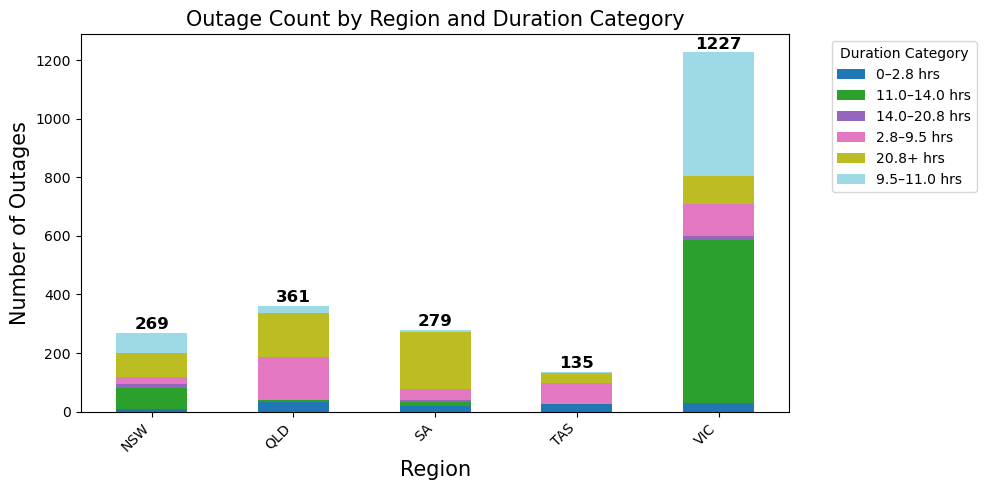


Total number of outages per region:
Region
NSW     269
QLD     361
SA      279
TAS     135
VIC    1227
dtype: int64


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

fontsize = 15

# Step 1: Create crosstab of outages by Region and Duration_Category
region_duration_counts = pd.crosstab(df['Region'], df['Duration_Category'])

# Step 2: Plot stacked bar chart
ax = region_duration_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    colormap='tab20'
)

# Step 3: Styling
plt.title("Outage Count by Region and Duration Category", fontsize=fontsize)
plt.xlabel("Region", fontsize=fontsize)
plt.ylabel("Number of Outages", fontsize=fontsize)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Duration Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Step 4: Annotate total counts on top of each bar
totals = region_duration_counts.sum(axis=1)
for idx, total in enumerate(totals):
    ax.text(
        idx, total + 2,            # x-position and y-position above bar
        str(total),                # text to display
        ha='center', va='bottom',  # horizontal and vertical alignment
        fontsize=fontsize-3, fontweight='bold'
    )

plt.show()

# Step 5: Also print total outage counts
print("\nTotal number of outages per region:")
print(totals)

In [8]:
# Create crosstab (raw counts)
region_duration_counts = pd.crosstab(df['Region'], df['Duration_Category'])

# Normalize row-wise to get percentage (sum = 100% per region)
region_duration_percent = region_duration_counts.div(region_duration_counts.sum(axis=1), axis=0) * 100

# Display as percentage breakdown
print("Percentage Breakdown of Duration Categories by Region (%):")
print(region_duration_percent.round(2))

Percentage Breakdown of Duration Categories by Region (%):
Duration_Category  0–2.8 hrs  11.0–14.0 hrs  14.0–20.8 hrs  2.8–9.5 hrs  \
Region                                                                    
NSW                     2.97          26.77           4.83         8.92   
QLD                     9.14           1.39           0.00        41.55   
SA                      6.45           5.38           1.79        13.62   
TAS                    18.52           0.00           0.00        53.33   
VIC                     2.44          45.40           0.98         9.05   

Duration_Category  20.8+ hrs  9.5–11.0 hrs  
Region                                      
NSW                    30.48         26.02  
QLD                    41.55          6.37  
SA                     70.25          2.51  
TAS                    25.93          2.22  
VIC                     7.74         34.39  
